In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
lit = pd.read_excel('../shared_data_read_only/Data/AfriKids/ExternalReports/Ghana_2021_Census_Reports/Vol_3D_Literacy and Education_district.xlsx')


In [78]:
lit.iloc[:40]

,"Table 3D.1a: Population 6 years and older by literacy status, sex, type of locality and district",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,Literacy Status,Western Region,NaN,NaN,Districts,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Number,Percent,NaN,Jomoro Municipal,Ellembelle,Nzema East Municipal,Ahanta West Municipal,Effia Kwesimintsim Municipal,Sekondi Takoradi Metropolitan Area (STMA),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,All Locality Types,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Both sexes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Total,1764583,100,0.0,107360,102571,80117,130920,152451,92761,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Not literate,483403,27.394744,NaN,36331,31771,32560,38266,15630,9407,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Literate,1281180,72.605256,NaN,71029,70800,47557,92654,136821,83354,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Total,895914,100,NaN,52972,51261,41358,64167,75029,45305,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
len(region_list)

16

In [83]:
region_list = [x for x in lit.iloc[:, 1].unique() if isinstance(x, str)]
region_list.remove('Number') #get ride of "Number"
print(region_list)
gender_list = ['Both sexes', 'Male', 'Female']
lit_list = ['Not literate', 'Literate']
locality_list = ['Total', 'Urban', 'Rural']
number_list = ['Number', 'Percent']

mask1 = ~lit.iloc[:, 1].isin(region_list)


# Use the combined mask to filter the DataFrame
lit_filtered = lit[mask1]

lit_filtered = lit_filtered.dropna(axis=1, how='all').drop(lit_filtered.columns[3:], axis = 1).reset_index(drop = True)
# Display the DataFrame after removing columns with all NaN values
lit_filtered = lit_filtered[(lit_filtered.iloc[:, 0] == 'Literate') | (lit_filtered.iloc[:, 0] == 'Not literate')]
lit_filtered = lit_filtered.drop(lit_filtered.columns[0], axis = 1).reset_index(drop = True)

multi_index = pd.MultiIndex.from_product(
    [region_list, locality_list, gender_list,  lit_list],
    names=['Region', 'Locality', 'Gender', 'Literacy']
)

# Create an empty DataFrame with the multi-index
df_age = pd.DataFrame(index=multi_index, columns = ['Literacy', 'Literacy Rate'])


for i in range(288):
    df_age.iloc[i, 0] = lit_filtered.iloc[i, 0]
    df_age.iloc[i, 1] = lit_filtered.iloc[i, 1]

['Western Region', 'Central Region', 'Greater Accra Region', 'Volta Region', 'Eastern Region', 'Ashanti  Region', 'Western North Region', 'Ahafo Region', 'Bono Region', 'Bono East Region', 'Oti Region', 'Northern Region', 'Savannah Region', 'North East Region', 'Upper East Region', 'Upper West Region']


In [84]:
df_age

Literacy Literacy Rate
Region            Locality Gender     Literacy                           
Western Region    Total    Both sexes Not literate   483403     27.394744
                                      Literate      1281180     72.605256
                           Male       Not literate   210733     23.521566
                                      Literate       685181     76.478434
                           Female     Not literate   272670     31.389401
...                                                     ...           ...
Upper West Region Rural    Both sexes Literate       202704     36.649502
                           Male       Not literate   158633     58.909838
                                      Literate       110648     41.090162
                           Female     Not literate   191751     67.563873
                                      Literate        92056     32.436127

[288 rows x 2 columns]

In [86]:
literate_df = df_age.xs('Literate', level='Literacy')
literate_df

Literacy Literacy Rate
Region            Locality Gender                           
Western Region    Total    Both sexes  1281180     72.605256
                           Male         685181     76.478434
                           Female       595999     68.610599
                  Urban    Both sexes   757391     82.218671
                           Male         390896     85.803342
...                                        ...           ...
Upper West Region Urban    Male          74597     77.195397
                           Female        69899     66.860204
                  Rural    Both sexes   202704     36.649502
                           Male         110648     41.090162
                           Female        92056     32.436127

[144 rows x 2 columns]

In [90]:
literate_df_reset = literate_df.reset_index()


In [141]:
literate_df_reset.iloc[100:150]

,Region,Locality,Gender,Literacy,Literacy Rate
100,Northern Region,Total,Male,432011,48.098327
101,Northern Region,Total,Female,323575,34.780707
102,Northern Region,Urban,Both sexes,515059,57.725862
103,Northern Region,Urban,Male,285906,65.397477
104,Northern Region,Urban,Female,229153,50.355771
105,Northern Region,Rural,Both sexes,240527,25.690138
106,Northern Region,Rural,Male,146105,31.69299
107,Northern Region,Rural,Female,94422,19.867399
108,Savannah Region,Total,Both sexes,171085,32.811676
109,Savannah Region,Total,Male,96140,36.706145


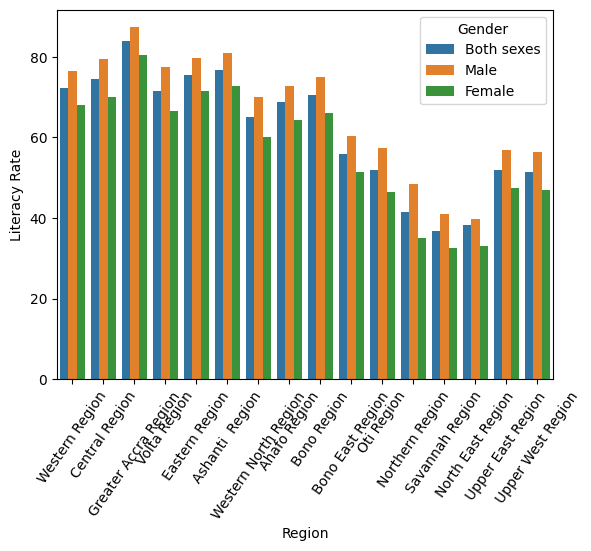

In [94]:
import matplotlib.pyplot as plt

# Create a bar plot
sns.barplot(y='Literacy Rate', x='Region', hue='Gender', data=literate_df_reset, errorbar=('ci', False))

# Rotate the x-axis labels to 45 degrees
plt.xticks(rotation=55)

# Display the plot
plt.show()

/home/jupyter-user-1/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/jupyter-user-1/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/home/jupyter-user-1/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/jupyter-user-1/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/jupyter-user-1/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated.

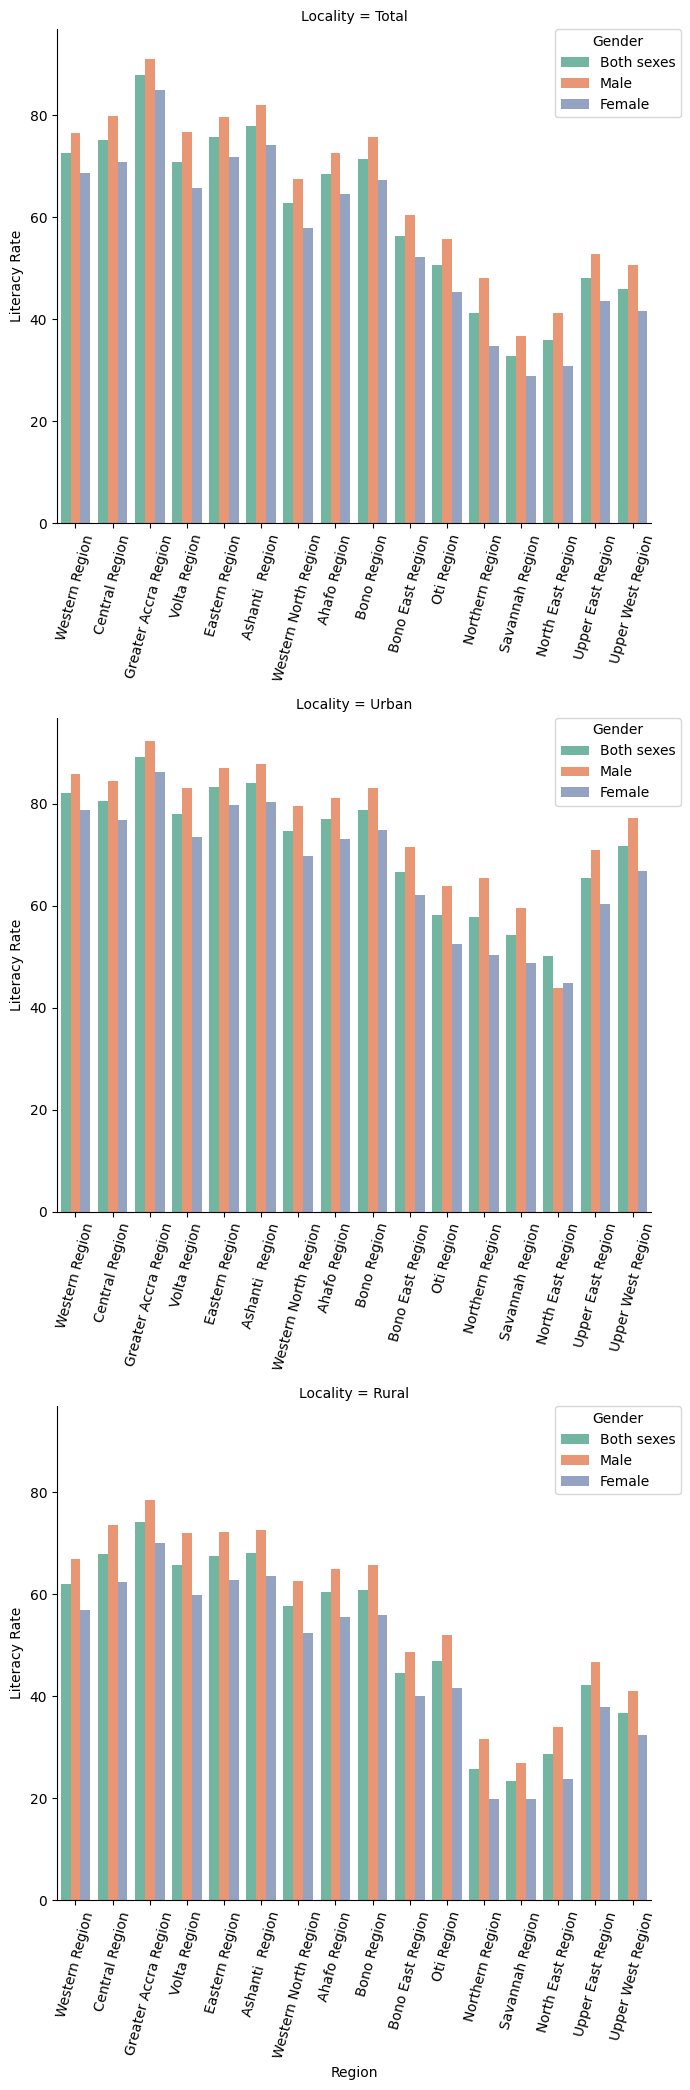

In [137]:
g = sns.FacetGrid(literate_df_reset, col='Locality', col_wrap=1, height=7, aspect=1, sharex=500)

# Map the barplot to each facet
g.map(sns.barplot, 'Region', 'Literacy Rate', 'Gender', ci=False, palette='Set2')

# Rotate the x-axis labels for better readability
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=75)

# Adjust the layout

g.axes[0].legend(title='Gender', loc='upper right', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
g.axes[1].legend(title='Gender', loc='upper right', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
g.axes[2].legend(title='Gender', loc='upper right', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.tight_layout()


# Display the plot
plt.show()

In [138]:
literate_df.to_csv('Downloads')

In [147]:
literate_df['Literacy'].sum() / 2

36567796.0

In [81]:
lit_filtered

,Unnamed: 1,Unnamed: 2
0,483403,27.394744
1,1281180,72.605256
2,210733,23.521566
3,685181,76.478434
4,272670,31.389401
...,...,...
283,202704,36.649502
284,158633,58.909838
285,110648,41.090162
286,191751,67.563873


In [143]:
PPL = pd.read_excel('../shared_data_read_only/Data/AfriKids//InternalData/Project_Surveys/AfriKids PPL Impact Numbers 2019.xlsx')


In [144]:
PPL

,PROJECT & SERVICE AREA,MALE,FEMALE,TOTAL
0,AfMC(HEALTH),NaN,NaN,NaN
1,Quality and reliable health care provided to c...,13674.0,24461.0,38135.0
2,TOTAL,13674.0,24461.0,38135.0
3,SCP(CHILD PROTECTION AND HEALTH),NaN,NaN,NaN
4,children with disabilities have access to school,40.0,12.0,52.0
...,...,...,...,...
79,Women are financially empowered to become sust...,11.0,1007.0,1018.0
80,TOTAL,11.0,1007.0,1018.0
81,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN


In [145]:
PPL.iloc[:50]

,PROJECT & SERVICE AREA,MALE,FEMALE,TOTAL
0,AfMC(HEALTH),NaN,NaN,NaN
1,Quality and reliable health care provided to c...,13674.0,24461.0,38135.0
2,TOTAL,13674.0,24461.0,38135.0
3,SCP(CHILD PROTECTION AND HEALTH),NaN,NaN,NaN
4,children with disabilities have access to school,40.0,12.0,52.0
5,Suspected spirit children rescued and receive ...,53.0,38.0,91.0
6,Community members aware of spirit child phenom...,518.0,1132.0,1650.0
7,Soothsayers and Concoction men turned into rig...,7.0,0.0,7.0
8,family members living with children with disab...,88.0,104.0,192.0
9,Children attending Child Rights Clubs learn a...,629.0,956.0,1585.0


In [ ]:
# about 30,000 beneficially impacted by education